# Sentimen Analisis menggunakan Naive Bayes Classifiers
Fakhri Alhafizh (10120025)

## Import Libraries

In [1]:
!pip install PySastrawi

In [2]:
#!conda install -y gdown

In [3]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fakhr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Connect DB

In [4]:
#importing the training data
tokped = pd.read_csv('PRDECT-ID Dataset.csv')
tokped.head()

Category                                       Product Name  \
0  Computers and Laptops  Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1  Computers and Laptops  PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2  Computers and Laptops                SSD Midasforce 128 Gb - Tanpa Caddy   
3  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   

                 Location   Price  Overall Rating  Number Sold  Total Review  \
0           Jakarta Utara   53500             4.9         5449          2369   
1  Kota Tangerang Selatan   72000             4.9         2359          1044   
2           Jakarta Barat  213000             5.0        12300          3573   
3           Jakarta Timur   55000             4.7         2030           672   
4           Jakarta Timur   55000             4.7         2030           672   

   Customer Rating                                    Customer Review  \
0                5  Alhamdulillah berfungsi dengan baik. Packaging...   
1                5  barang bagus dan respon cepat, harga bersaing ...   
2                5  barang bagus, berfungsi dengan baik, seler ram...   
3                5  bagus sesuai harapan penjual nya juga ramah. t...   
4                5  Barang Bagus, pengemasan Aman, dapat Berfungsi...   

  Sentiment Emotion  
0  Positive   Happy  
1  Positive   Happy  
2  Positive   Happy  
3  Positive   Happy  
4  Positive   Happy

## Data Exploration

In [5]:
# Menampilkan seluruh kolom di dalam dataset
tokped.columns

Index(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating', 'Customer Review',
       'Sentiment', 'Emotion'],
      dtype='object')

In [6]:
# Menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = tokped.info()
print('Ringkasan informasi:', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB
Ringkasan informasi: None


In [7]:
# menghitung dan menampilkan Missing Values
print('Jumlah missing values disetiap kolom:\n', tokped.isnull().sum())

Jumlah missing values disetiap kolom:
 Category           0
Product Name       0
Location           0
Price              0
Overall Rating     0
Number Sold        0
Total Review       0
Customer Rating    0
Customer Review    0
Sentiment          0
Emotion            0
dtype: int64


In [8]:
# Menghapus kolom yang tidak diperlukan
tokped.drop(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating'
       , 'Emotion'], axis=1, inplace=True)

print('Ringkasan dataset setelah dilakukan manipulasi data', tokped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Review  5400 non-null   object
 1   Sentiment        5400 non-null   object
dtypes: object(2)
memory usage: 84.5+ KB
Ringkasan dataset setelah dilakukan manipulasi data None


In [9]:
tokped.head()

Customer Review Sentiment
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive
1  barang bagus dan respon cepat, harga bersaing ...  Positive
2  barang bagus, berfungsi dengan baik, seler ram...  Positive
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive

In [10]:
# Menghapus data duplikat 

# Menghitung jumlah ulasan yang duplikasi
tokped.duplicated().sum()

95

In [11]:
# Menghapus duplikasi ulasan agar nantinya model tidak mempelajari kata yang sama secara berulang
tokped.drop_duplicates(inplace=True)

In [12]:
# mengecek kembali jumlah duplikat setelah di hapus
tokped.duplicated().sum()

0

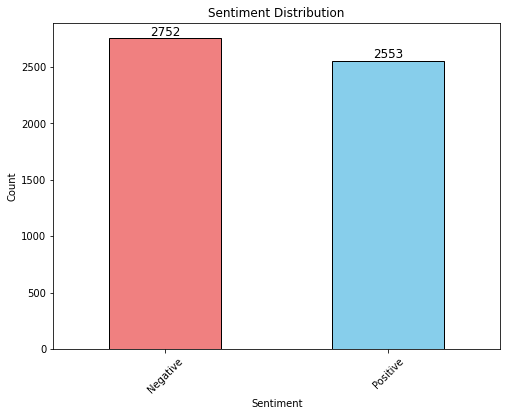

In [13]:
# Create a bar plot of the 'Sentiment' column
sentiment_counts = tokped['Sentiment'].value_counts()
ax = sentiment_counts.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black', figsize=(8, 6))

# Add labels and a title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

Ulasan sudah bersih dari duplikasi dan siap untuk melanjutkan proses, yaitu persiapan data untuk membersihkan ulasan dari emoji, tanda baca, ketidakserasian jenis huruf, pengulangan kata, normalisasi, dll.

## Data Preparation

### Case Folding

In [14]:
# Merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

tokped['clean_review'] = tokped['Customer Review'].apply(lambda low:lowercase(str(low)))

In [15]:
tokped.head()

Customer Review Sentiment  \
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive   
1  barang bagus dan respon cepat, harga bersaing ...  Positive   
2  barang bagus, berfungsi dengan baik, seler ram...  Positive   
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   

                                        clean_review  
0  alhamdulillah berfungsi dengan baik. packaging...  
1  barang bagus dan respon cepat, harga bersaing ...  
2  barang bagus, berfungsi dengan baik, seler ram...  
3  bagus sesuai harapan penjual nya juga ramah. t...  
4  barang bagus, pengemasan aman, dapat berfungsi...

### Remove the emoji of the text.

In [16]:
# Menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

tokped['clean_review'] = tokped['clean_review'].apply(lambda emoji: remove_emoji(emoji))

In [17]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar
# terkait topik dari ulasan yang diutarakan

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

tokped['clean_review'] = tokped['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

In [18]:
# Menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

tokped['clean_review'] = tokped['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [19]:
tokped.head()

Customer Review Sentiment  \
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive   
1  barang bagus dan respon cepat, harga bersaing ...  Positive   
2  barang bagus, berfungsi dengan baik, seler ram...  Positive   
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   

                                        clean_review  
0  alhamdulillah berfungsi dengan baik packaging ...  
1  barang bagus dan respon cepat harga bersaing d...  
2  barang bagus berfungsi dengan baik seler ramah...  
3  bagus sesuai harapan penjual nya juga ramah tr...  
4  barang bagus pengemasan aman dapat berfungsi d...

In [20]:
# Menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

tokped['clean_review'] = tokped['clean_review'].apply(lambda num: remove_superscript(num))

In [21]:
# Melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

tokped['clean_review'] = tokped['clean_review'].apply(lambda word: word_repetition(word))

In [22]:
# Melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

tokped['clean_review'] = tokped['clean_review'].apply(lambda word: repetition(word))

In [23]:
# Menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

tokped['clean_review'] = tokped['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

In [24]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar',
         'syantienurxsayurbox', 'ghinaxsayurbox', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

tokped['clean_review'] = tokped['clean_review'].apply(lambda banned:RemoveBannedWords(banned))

In [25]:
tokped.head()

Customer Review Sentiment  \
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive   
1  barang bagus dan respon cepat, harga bersaing ...  Positive   
2  barang bagus, berfungsi dengan baik, seler ram...  Positive   
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   

                                        clean_review  
0  alhamdulillah berfungsi dengan baik packaging ...  
1  barang bagus dan respon cepat harga bersaing d...  
2  barang bagus berfungsi dengan baik seler ramah...  
3  bagus sesuai harapan penjual nya juga ramah tr...  
4  barang bagus pengemasan aman dapat berfungsi d...

### Change slang into standard terms (Normalization Phase)

In [26]:
# Menormalisasikan kata singkat dan tidak baku menjadi kata baku sesuai dengan KBBI.

!gdown --id 1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [28]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [29]:
clean_text = []
for review in tokped['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [30]:
clean_text

['alhamdulillah berfungsi dengan baik packaging aman respons cepat dan ramah seller dan kurir amanah',
 'barang bagus dan respons cepat harga bersaing dengan yang lain',
 'barang bagus berfungsi dengan baik seler ramah pengiriman cepat',
 'bagus sesuai harapan penjual nya juga ramah terima kasih pelapak',
 'barang bagus pengemasan aman dapat berfungsi dengan baik',
 'barang bagus seller ramah',
 'mantap paten joss',
 'works fine respons seller cepat barang berfungsi dengan baik rekomendasi',
 'barang bagus segel utuh original berfungsi dengan benar seller respons nya ajib cepat amir sudah begitu kasih sarannya pas banget lagi dengan kebutuhan mantap',
 'barang datang dan berfungsi dengan baik dan terlihat bagus kali ada lampu birunya',
 'pengiriman sangat cepat barang bagus rekomendasi seller terima kasih',
 'alhamdulillah barangnya sudah sampai di coba bagus semoga awet terima kasih seller kurir dan tokopedia',
 'penjual amanah responsif kabel berfungsi baik pengiriman cepat terima ka

In [31]:
tokped['normalization'] = clean_text

In [32]:
tokped.head()

Customer Review Sentiment  \
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive   
1  barang bagus dan respon cepat, harga bersaing ...  Positive   
2  barang bagus, berfungsi dengan baik, seler ram...  Positive   
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   

                                        clean_review  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respon cepat harga bersaing d...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah tr...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                       normalization  
0  alhamdulillah berfungsi dengan baik packaging ...  
1  barang bagus dan respons cepat harga bersaing ...  
2  barang bagus berfungsi dengan baik seler ramah...  
3  bagus sesuai harapan penjual nya juga ramah te...  
4  barang bagus pengemasan aman dapat berfungsi d...

### Delete words containing 3 letters

Setelah melakukan analisis terhadap ulasan yang telah bersih, menghapus kata abstrak tidak cukup untuk membuat ulasan bersih karena masih ditemukan beberapa kata yang tidak sesuai dan membingungkan. Oleh karena itu, saya melakukan penghapusan kata yang terdiri dari 3 huruf, seperti oh, iya, ini, itu, dll, dan tidak memberikan informasi penting bagi model saat melakukan prediksi.

In [33]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

tokped['final_text'] = tokped['normalization'].apply(lambda remove: remove_small_words(str(remove)))

### Word Tokenizing

In [34]:
def word_token(review_text):
  return word_tokenize(review_text)

In [35]:
tokped['token'] = tokped['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [36]:
tokped.head()

Customer Review Sentiment  \
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive   
1  barang bagus dan respon cepat, harga bersaing ...  Positive   
2  barang bagus, berfungsi dengan baik, seler ram...  Positive   
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   

                                        clean_review  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respon cepat harga bersaing d...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah tr...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                       normalization  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respons cepat harga bersaing ...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah te...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                          final_text  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus  respons cepat harga bersaing den...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual  juga ramah terim...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                               token  
0  [alhamdulillah, berfungsi, dengan, baik, packa...  
1  [barang, bagus, respons, cepat, harga, bersain...  
2  [barang, bagus, berfungsi, dengan, baik, seler...  
3  [bagus, sesuai, harapan, penjual, juga, ramah,...  
4  [barang, bagus, pengemasan, aman, dapat, berfu...

### Wordcloud Visualization

In [37]:
review_all = []

for review in tokped['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

alhamdulillah
berfungsi
dengan
baik
packaging
aman
respons
cepat
ramah
seller
kurir
amanah
barang
bagus
respons
cepat
harga
bersaing
dengan
yang
lain
barang
bagus
berfungsi
dengan
baik
seler
ramah
pengiriman
cepat
bagus
sesuai
harapan
penjual
juga
ramah
terima
kasih
pelapak
barang
bagus
pengemasan
aman
dapat
berfungsi
dengan
baik
barang
bagus
seller
ramah
mantap
paten
joss
works
fine
respons
seller
cepat
barang
berfungsi
dengan
baik
rekomendasi
barang
bagus
segel
utuh
original
berfungsi
dengan
benar
seller
respons
ajib
cepat
amir
sudah
begitu
kasih
sarannya
banget
lagi
dengan
kebutuhan
mantap
barang
datang
berfungsi
dengan
baik
terlihat
bagus
kali
lampu
birunya
pengiriman
sangat
cepat
barang
bagus
rekomendasi
seller
terima
kasih
alhamdulillah
barangnya
sudah
sampai
coba
bagus
semoga
awet
terima
kasih
seller
kurir
tokopedia
penjual
amanah
responsif
kabel
berfungsi
baik
pengiriman
cepat
terima
kasih
alhamdulillah
barang
sudah
sampai
bisa
dipakai
semoga
berfungsi
dengan
baik
awet
kurirnya

pengantarnya
pengemudi
send
sudah
mengantarkan
paket
dengan
baik
tapi
durasi
proses
dari
toko
sangat
lama
padahal
butuhnya
tanggal
maret
makanya
saya
pilih
pengiriman
instan
saya
juga
sudah
tanya
pihak
toko
jika
paket
bisa
dikirim
hari
juga
atau
tidak
jawabannya
bisa
tapi
kenyataannya
paket
saya
tidak
dikirim
pada
hari
juga
kalau
tidak
bisa
dikirim
hari
juga
bilang
saya
juga
sudah
ajukan
batal
pesanan
juga
tidak
respons
dari
penjual
pelayanan
sangat
buruk
tidak
rekomendasi
semoga
lebih
baik
lagi
kedepannya
barang
ternyata
palsu
tidak
jelas
informasi
bohong
yang
bikin
pengalaman
tidak
menyenangkan
kalau
beli
produk
cari
toko
lain
yang
tipu
headphone
datang
dengan
keadaan
bikin
kuping
sakit
mati
dari
awal
datang
penjual
tidak
respons
barang
tidak
lulus
kualitas
sepertinya
yang
dijual
hati
kalau
beli
hati
belanja
disini
dapat
unit
cacat
dblg
suruh
ajukan
komplain
nanti
dituker
ternyata
tokonya
sendiri
yang
bilang
gabs
dituker
official
store
abal
tidak
jelas
solusinya
bagaimana
pelayanan
t

yauda
saya
minta
balikin
selisih
saja
dengan
suruh
isiin
pulsa
saya
saja
15rb
sudah
6hari
pulsa
tidak
masuk
ditanyain
jawab
saja
parah
tidak
amanah
kartunya
semua
katanya
asli
bagaimana
kotaknya
jelek
penyok
bungkus
seadanya
saja
sudah
sampenya
lama
banget
semingguan
terus
barangnya
coba
bahkan
patah
sialan
akan
nomor
bagus
tidak
puas
proses
kemas
kirim
lama
seller
ditanya
hanya
jawab
mohon
sabar
mohon
tunggu
tidak
kasih
kepastian
kapan
kirim
harus
dijawab
bisa
tidak
barang
pickup
sendiri
gudang
kurir
karena
perlu
tokonya
tidak
sportif
tidak
koperatif
pengalaman
buruk
belanja
toko
barang
cacat
diajukan
keluhan
tapi
tidak
bertanggung
jawab
chat
lewat
tokopedia
ataupun
whatsapp
tapi
tanggapannya
memutar
saja
kebanyakan
basa
basi
padahal
tidak
bertanggung
jawab
makan
uang
buat
istri
hati
dengan
toko
jualan
ngotott
tidak
laku
toko
bang
pengiriman
lama
banget
dough
juga
jelek
banget
tidak
lentur
tidak
seperti
biasanya
paket
mulus
sampai
tujuan
toko
juga
sudah
terpercaya
mantap
suka
anak
jad

jujur
kecewa
banget
kecewa
sama
antar
saja
jadi
basi
kopsus
saya
karena
sameday
tapi
nyampenya
malam
baru
sehari
sudah
basi
belum
hari
kulkas
tapi
sudah
basi
hiks
dikirimin
kopi
langsung
masukkan
kulkas
besok
mencoba
basi
pesan
kopi
keluarga
botol
yang
dikirim
cuma
botol
penjual
chat
tidak
respons
sama
sekali
sangat
mengecewakan
penjualnya
maap
pemesanan
rasanya
beda
dengan
pemesanan
pertama
yang
luar
biasa
enaknya
yang
lebih
pahit
daripada
sblmnya
lagipula
pada
pemesanan
saya
menemukan
rambut
dalam
kopinya
mohon
dijaga
kualitas
rasanya
meski
banyak
pesanan
terima
kasih
baru
diminum
sedikit
besoknya
sudah
basi
pesan
hari
selasa
malam
sampai
rumah
rabu
sore
kamis
masih
aman
jumat
pagi
minum
sudah
asam
padahal
masih
banyak
jadi
kecewa
rasa
udang
rebon
semur
ayam
lele
kikil
enak
semua
tapi
untuk
ayam
ungkepnya
maaf
benar
mengecewakan
pertama
kali
saya
buka
boxnya
baunya
amis
tidak
segar
tercium
lalu
saya
goreng
masih
amis
barusan
saya
coba
ungkep
ulang
dengan
bumbu
ayam
goreng
saya
goreng

tidak
dikonfirmasi
dahulu
sebelum
dikirim
minimal
maap
akan
teknologi
chat
aplikasi
kenapa
tidak
konfirmasi
dahulu
chat
saya
sudah
terlanjur
klik
pesanan
selesai
tidak
bisa
ajukan
pengembalian
dana
pembeli
yang
lain
silakan
dicermati
kalau
beli
disini
hati
terima
kasih
belum
tahu
dimana
keberadaannya
setelah
dibuka
bungkusannya
ternyata
tidak
dikirim
bersamaan
dengan
paket
diskon
yang
lain
saya
sebaga
pembeli
juga
salah
karena
langsung
menyelesaikan
transaksi
begitu
dapat
kabar
paket
dari
satpam
tanpa
memeriksanya
mengecewakan
sekali
pelayanan
deli
meskipun
diskon
minta
yang
pink
dikirim
yang
biru
terus
dapat
yang
penyok
kecewa
banget
udahh
responsnya
lama
estimasi
datang
carabungkusnya
tidak
rapi
dalemannya
ristek
pulaa
kecewa
jelek
banget
lakbannya
sangat
tipis
terlalu
lengket
yang
lengket
bahkan
sisi
yaitu
bagian
bawah
atas
jadinya
sangat
mengganggu
karena
bisa
mengakibatkan
paket
orang
lain
menempel
pada
paket
kita
penyok
seller
sombong
tidak
sopan
kacau
beli
lebih
dari
lusin
tidak

bangeey
kualitas
produk
sangat
baik
produk
original
harga
produk
sangat
baik
kecepatan
pengiriman
sangat
baik
respons
penjual
sangat
baik
sudah
diterima
dengan
baik
mantap
keren
banget
mevvah
terima
kasih
untuk
fast
respons
fast
pengiriman
rekomendasi
jadi
hitam
kembali
mantap
produk
original
bahanya
kuat
menjadi
seperti
baru
kembali
bagus
jadi
hitam
kembali
mantap
mantap
sesuai
pesanan
belum
coba
semoga
bagus
dapat
kain
microfiber
fungsi
dicoba
dahulu
kalau
buat
sekarang
biar
tokonya
joss
jadi
hitam
kembali
mantap
pesan
datang
cepat
rusak
gampang
sobek
kotor
tidak
rekomendasi
barang
tidak
datang
penipuan
barang
tidak
dikirim
tidak
usah
mengadakan
flash
sale
kalau
tidak
stok
kualitas
pelayanan
sama
kayak
pedagang
emperan
atau
bahkan
lebih
rendah
jangan
beli
toko
kalau
tidak
ingin
kecewa
asli
bukan
agen
atau
distributor
resmi
jika
dilihat
dari
pelayanannya
sebagai
informasi
barang
tidak
belum
saya
terima
saya
membayar
atas
kualitas
yang
diberikan
jadi
harga
pelayanan
kalian
hanya
senila

kakak
semoga
konsumen
lain
tidak
mengalami
seperti
kucingnya
muntah
pesan
tanggal
febuari
baru
diterima
hari
tanggal
diketerangan
estimasi
diterima
tanggal
maret
padahal
sama
jakarta
cukup
sekali
saja
beli
disini
kapok
rekomendasi
seller
tidak
dikrm
eksp
toko
tidak
bertanggung
jawab
terakhir
saya
beli
packnya
tidak
kenceng
sobek
semua
berceceran
dijalan
saya
beli
rusak
yang
sobek
semua
isinya
tumpah
kemana
yang
satu
pack
sampai
saya
sudah
tinggal
mungkin
pengemudi
yang
bawa
juga
tidak
hati
bawanya
tapi
kalau
packnya
kuat
mungkin
tidak
kejadian
saya
biasa
beli
tidak
pernah
seperti
moon
maaf
juragan
tadi
paketnya
saya
buka
ternyata
bungkus
seperti
sudah
buka
dengan
silet
cutter
karena
sobekannya
rapi
dari
ujung
ujung
bungkusnya
posisikan
terbalik
ketika
buka
jadi
berantakan
semua
isinya
saya
pesan
bungkus
yang
rusak
bungkus
saya
sudah
sering
pesan
sudah
kali
kejadian
seperti
tapi
kejadian
yang
sekarang
yang
paling
parah
maaf
tidak
bisa
saya
toleransi
karena
menurut
saya
sudah
kelewatan
s

seperti
kahf
perlu
ganti
supplier
botol
kecewa
wanginya
biasa
saja
wanginya
tidak
tahan
boro
bisa
seperti
iklannya
masih
bagus
bibit
parfum
pinggir
jalan
kecewa
sudah
beli
tidak
wangiwanginya
cuman
alcohol
saja
yang
keluar
pembelian
kedua
tapi
saya
kecewa
beli
pertama
kali
suka
banget
parfumnya
makanya
pesan
lagi
tapi
wanginya
tidak
konsisten
beda
sama
yang
sebelumnya
terus
kemasan
juga
kelihatan
kayak
luntur
begitu
tulisannya
dipegang
botol
parfumnya
luntur
tangan
official
tapi
lama
banget
sudah
pakai
rutin
bulan
tidak
hasil
payah
edny
kurang
sebulan
pantes
dijual
parah
banget
responsnya
komplain
barang
kurang
disuruh
melalui
whatsapp
sudah
whatsapp
disuruh
lagi
lewat
marketplace
ampun
sudah
sejelek
pelayanan
sekelas
official
unilever
saya
dimarahin
saya
barangnya
kurang
sangat
amat
buruk
mereka
yang
bilang
tapi
yang
datang
bahkan
bulan
sekelas
unilever
begini
ternyata
mereka
suruh
refund
kalau
barangnya
sudah
sampai
baru
ongkos
kirim
ganti
apakah
kalian
bisa
ganti
waktu
yang
kebuang


saya
butuh
untuk
tugas
kampus
barang
yang
saya
terima
rusak
pecah
tempat
krayonnya
saya
tidak
tahu
kesalahan
dari
toko
karena
dikemasnya
terlalu
bersemangat
atau
bagian
pengirimannya
kecewa
penjual
kurang
teliti
memberi
saran
kepada
pembeli
hasil
embossed
nama
berwarna
putih
kontras
sekali
jelek
perpaduannya
minta
nomor
diembose
sudah
tercatat
tapi
penjual
juga
lalai
mengkomentari
sehingga
hasilnya
juga
tidak
diembosed
mengecewakan
saya
tidak
bisa
kasih
foto
karena
nama
tercetak
barangnya
sama
sekali
tidak
sampai
pesan
juga
balon
hati
juga
beda
tidak
sesuai
gede
balonnya
tidak
sebesar
yang
iklan
padahal
sudah
tanya
sebelumnya
sama
penjualnya
tidak
balon
warna
gold
dama
silver
kalau
pesan
balo
gold
sama
silvernya
saja
item
yang
datang
warna
warni
kayak
begini
sebelumnya
sudah
chating
katanya
hufth
padahal
sudah
kali
beli
sini
baru
kali
kecewa
kecewa
dengan
pelayanan
toko
barang
bermasalah
disuruh
tekan
komplain
tetapi
kenyataannya
rumit
dibelakangnya
kapok
belanja
disini
barang
hanya
se

roll
besar
hanya
1rban
saja
mungkin
seller
jualan
bubble
bukan
jualan
kali
disuruh
tambah
bubble
wrap
bahkan
bubble
wrap
pengepakan
sendiri
tidak
mengerti
sudah
tambah
buble
wrap
tetap
saja
tipis
packingan
dipaksa
beli
setelah
checkout
hati
saja
sama
toko
barang
tidak
dikirimkan
next
mohon
lebih
diperhatikan
kurang
merekat
percuma
tambah
pengepakan
kalau
kardus
susu
tetap
penyok
cara
kemas
jangan
ngepres
sama
kardusnya
biar
ketika
kardus
ketekan
kemasan
susunya
tidak
rusak
langsung
pesan
pakai
kardus
ternyata
dikirim
pakai
plastik
saja
cepat
tiba
kemasan
bagus
barangnya
juga
bagus
produk
kualitas
bagus
berfungsi
dengan
baik
cepat
sampai
barang
sesuai
pesanan
produk
berfungsi
dengan
baik
packaging
aman
bagus
barang
sesuai
deskripsi
mantap
barangnya
kokoh
kualitas
pesan
satu
lagi
waahh
keren
mantap
barangnya
pengiriman
cepat
banget
cuma
hari
sudah
sampai
terima
kasih
juragan
barang
sesuai
dengan
pesanan
seller
responsif
pengiriman
cepat
terima
kasih
seller
tokopedia
semoga
sukses
selalu


bisa
pesanan
yang
kali
selalu
puas
unit
mantap
seller
ramah
gerak
cepat
kurir
cepat
next
pesan
lagi
barang
sesuai
deskripsi
pegangan
kokoh
stabil
packaging
aman
bagus
pesanan
selalu
puas
seller
gerak
cepat
hari
minggu
dikirim
kurir
cepat
next
pesan
lagi
mantap
pegangan
kokoh
stabil
packaging
aman
bagus
luar
biasa
barang
sesuai
deskripsi
barang
sampai
dengan
selamat
sudah
coba
lumayan
bagus
sesuai
harga
next
akan
beli
lagi
alat
yang
lainnya
packaging
aman
bagus
padahal
pesan
siang
tapi
pesanan
baru
dikirim
hari
esoknya
bukan
hari
yang
sama
tidak
rekomendasi
tokonya
setelah
kemasan
dibuka
tercium
aroma
kecoa
yang
sangat
menyengat
entah
apakah
mata
disimpan
tempat
yang
bersih
atau
tidak
beda
sekali
kualitas
dengan
penampilan
foto
barang
datang
tidak
sesuai
pict
tidak
bisa
pakai
rusak
pengaturan
aliran
itungamal
harga
flashsale
ongkos
kirim
produk
tidak
berfungsi
baik
toko
tidak
amanah
bahkan
pembeli
disuruh
balikkin
produk
lagi
buang
ongkos
kirim
toko
tidak
baik
jangan
beli
disini
baru
sa

terbaik
nyaman
dipakai
bahannya
enak
fitting
buat
lari
banget
kekecilan
sebenarnya
tapi
tenang
garansi
hari
bisa
tuker
size
produk
original
produk
original
dijamin
termurah
nyaman
dipakai
pengepakan
rapi
cepat
produk
sesuai
deskripsi
rekomendasi
seller
terima
kasih
barang
sudah
diterima
cukup
bagus
bahan
designnya
nyaman
dipakai
bagus
pesan
saya
yang
kedua
sudah
diterima
dengan
baik
produk
sesuai
nyaman
dipakai
terima
kasih
enak
celananya
nyaman
dipakai
barang
bagus
sesuai
expectasi
pesan
lagi
keep
terbaik
kualitas
pelayanan
sesuai
pesanan
lama
banget
smpx
tapi
kualitas
bahan
mantap
dijamin
termurah
berfungsi
dengan
baik
seluruh
barang
diterima
dalam
keadaan
baik
sesuai
deskripsi
terima
kasih
kencang
nyaman
aman
untuk
aktivitas
dijamin
termurah
sesuai
pesanan
mantap
barang
telah
sampai
dengan
packaging
yang
bagus
bahannya
adem
banget
yang
saya
butuhkan
murah
kualitas
tidak
murahan
terima
kasih
seller
tokopedia
jadi
semangat
mancing
joss
produknya
toko
respons
cepat
mantap
cepat
sampai


biasa
barang
bagus
pengirim
cepat
s3moga
bermanfaat
packingan
aman
rapi
barangnya
bagus
terima
kasih
oxihom
tokopedia
express
barang
lucu
unik
pengiriman
barang
juga
cepat
sudah
yang
ketiga
kali
buat
disini
terbaik
banget
asli
cepat
tidak
obatt
mantap
pakcing
sangat
rapi
aman
relapict
sekali
suka
pokoknya
pesan
yang
ketiga
gerak
cepat
barang
pelayanan
juga
mantap
banget
aroma
rasa
bukan
sekadar
mantap
betul
mempesona
rasa
lidah
irit
kantong
terima
kasih
juragan
muaannttaapp
seperti
syamsul
jahitan
rapi
ukuran
warna
sesuai
dengan
foto
rekomendasi
mantaapplpll
gann
makasihh
semuanya
manattaapp
juragan
semoga
sukses
agan
mksshh
pelangganku
suka
bagus
sekalaa
uuhuy
sudah
diterima
sesuai
baguuss
baagguuss
toopp
markotoopp
pohonnya
masih
segar
bonusnya
juga
banyak
terima
kasih
sudah
beli
sini
keren
barang
kirimannya
segar
paten
mantap
rapi
high
kualitas
fast
respons
rekomendasi
bingit
mantaaff
memuaskan
banget
pembelian
korea
beli
pertama
vietnam
selalu
puas
langsung
konek
banget
sampai
temp

cepat
terima
kasih
seller
model
warna
suka
tapi
pemasangan
sedikit
rumit
semoga
awet
barang
mantap
original
robot
harga
juga
lumayann
bagus
original
suara
lumayan
semua
touch
kontrol
berfungsi
dengan
baik
batre
lumayan
awet
barangnya
original
mutu
terjamin
sini
gampang
dipakai
hemat
listrik
modelnya
keren
hemat
listrik
barangnya
berfungsi
dengan
baik
semoga
baterainya
awet
proses
pesanan
cepat
packaging
rapi
sesuai
dengan
harga
lumayan
lebih
kencang
dari
speaker
handphone
harganya
terjangkau
koneksi
android
lancar
produk
cepat
sampai
sesuai
deskripsi
tapi
chat
lambat
respons
secara
keseluruhan
bagus
kesel
sama
durasi
pengirimannya
saja
secara
keseluruhan
barangnya
bagus
barang
cuma
proses
kirim
agak
lama
admin
harus
chat
dahulu
baru
proses
barang
barang
sangat
lama
datang
sedikit
penyot
bagian
lampu
indikator
tapi
alhamdulillah
berfungsi
dengan
baik
suaranya
jernih
tapi
kurang
keras
casnya
tidak
berfungsi
tapi
tidak
saya
punya
sendiri
proses
pesanan
cepat
packaging
aman
packaging
rapi


ternyata
tidak
bisa
tukar
warna
padahal
belum
3hari
sesuai
standard
seharusnya
masih
bisa
dilakukan
refund
warna
pink
terlalu
kontras
tidak
sesuai
pada
gambar
pesan
warna
putih
tapi
yang
datang
warna
salem
kecewa
karena
penjual
tidak
konfirmasi
sebelum
dikirim
tolong
perhatikan
bagian
karet
kebalik
karetnya
tidak
sama
lurus
jahit
bahkan
dkirimin
barang
reject
bahan
jelek
panas
tipis
barang
belum
diterima
warna
tidak
sesuai
dengan
digambar
lubang
untuk
muka
sempit
tidak
enak
baru
terima
paket
siang
beli
mukena
disini
iklan
tidak
bilang
kalau
tanpa
saat
komplain
kenapa
mukena
kusut
bahkan
respons
kalau
sudah
dicuci
disetrika
masih
kusut
becanda
bikin
kesel
penjual
tidak
berfungsi
dengan
baik
suka
mati
sendiri
barang
tipis
tapi
udhlah
barang
sudah
terima
yang
agak
tebal
bahannya
yang
hitam
tipis
banget
sedih
kirain
bahannya
katun
ternyata
tipis
banget
licin
lemas
kalau
dibawa
jalan
kaki
berisik
bahannya
paketan
sudah
hari
belum
sampai
juga
penjual
menghubungi
tidak
bisa
lidah
kerudung
kel

secara
keseluruhan
bagus
sesuai
pesanan
cuma
tempat
kartu
kurang
lebar
potongannya
rapi
ukurannya
sesuai
warnanya
cantik
bahannya
adem
produk
berkualitas
produk
sesuai
dengan
foto
mantap
berkwalitaswarnanya
cantik
potongannya
rapi
ukurannya
sesuai
bahannya
adem
produk
berkualitas
produk
sesuai
dengan
foto
ukurannya
sesuai
bahannya
adem
produk
sesuai
dengan
foto
beli
beda
warna
tapi
sama
dikirim
warna
yang
sama
sudah
terlanjur
dipack
sama
diganti
saya
padahal
saya
terima
barang
tanggung
jawab
sekali
celana
sesuai
deskripsi
sudah
terima
pengepakannya
rapi
bahannya
lembut
enak
pakai
kurir
yang
selalu
ramah
mkshpotongannya
rapi
ukurannya
yang
besar
yang
kecil
tapi
lumayan
dengan
harga
segitu
terima
kasih
ukurannya
sesuai
bahannya
adem
produk
sesuai
dengan
foto
warnanya
cantik
produk
sesuai
dengan
foto
kualitas
produk
bagus
jahitan
rapi
potongannya
rapi
desainnya
cantik
kualitas
produk
bagus
jahitan
rapi
desainnya
cantik
cuma
kekurangannya
kalau
banyak
kartu
jadi
sesak
hehe
terima
kasih
ban

intinya
tidak
rekomendasi
buat
yang
main
emulator
respons
seller
sangat
cepat
tapi
tidak
bisa
ditampilkan
handphone
saya
dideskripsi
inch
bisa
ternyata
datang
pasang
handphone
samsung
tidak
muat
baca
dalamnya
maks
ktnya
inch
sama
buat
maen
bayar
tempat
rada
ngadat
maen
lancar
jaya
padahal
pengen
maen
bayar
tempat
baru
pakai
hari
sudah
tidak
bisa
pdhal
sudah
charge
penuh
baterenya
kecewa
rekomendasi
seller
barang
refurbish
kualitas
jelek
kenapa
tombol
kananny
gerak
sendiri
tidak
bisa
balik
kiri
seperti
lengket
begitu
mengirim
videony
tetapi
tidak
bisa
untuk
respons
penjual
bagus
tapi
kondisi
barang
biasa
saja
bahkan
agak
rusak
bagian
tombol
kadang
mati
sendiri
saat
menjalankan
game
baru
pakai
beberapa
minggu
saja
kabel
sudah
tidak
bisa
charge
yang
pasti
kabel
harus
khusus
beli
tempat
bagi
kalian
yang
beli
memikirkan
dahulu
mending
beli
stick
yang
lain
tanya
sama
admin
solusi
harus
beli
harganya
seratus
ribu
kualitas
cemen
seperti
begini
kasih
harga
segitu
memikirkan
dong
beli
rencana
bu

buruk
sekali
tidak
sesuai
spesifikasi
habis
komplain
tidak
layani
bahaya
sekali
saya
dikasih
rusak
touch
tidak
bisa
layar
awal
tapi
hari
kemudian
garis
horizontal
tengah
layar
besok
hari
layar
shadow
akhirnya
saya
pakai
yang
lama
penjual
banyak
alasan
saya
sebagai
pembeli
bahkan
disalahkan
pada
pemasangan
jangan
beli
disini
cukup
saya
saja
jadi
korban
pokoknya
jangan
yang
beli
disini
barang
rusak
minta
klaim
tetapi
seller
banyak
alasan
padahal
stiker
garansi
belum
rusak
damage
mohon
dipikir
kembali
kalau
beli
disini
mengisi
powerbanknya
lama
banget
sampai
lebih
coba
charge
hape
juga
lama
lebih
lama
dari
ngecharge
listrik
langsung
alatnya
sering
mati
sendiri
unreliable
walau
dptnya
flash
sale
69rb
tetap
tidak
worth
cuma
sekadar
charge
yang
ringan
saja
mungkin
produk
mengecewakan
kecewa
awalnya
tetapi
setelah
seminggu
pemakaian
entah
kenapa
tidak
bisa
sudh
saya
coba
berkali
kali
tetap
tidak
bisa
saya
sangat
kecewa
dengan
produk
kualitasnya
kurang
bagus
tidak
bisa
pakai
kecewa
jadi
barang

dalam
kondisi
bagus
mantap
sesuai
normal
bisa
digunakan
semoga
awet
batrainya
langsung
include
paket
sudah
sampai
sesuai
dengan
pesanan
remote
shutter
berfungsi
dengan
baik
tidak
rumit
kalok
dipakai
praktis
dibawa
kemana
terima
kasih
barangnya
sudahsampai
sangat
bagus
berguna
banget
pengiriman
juga
cepat
pengiriman
cepat
pengemasan
aman
mudah
ditampilkan
digunakan
bonus
backgroundnya
juga
banyak
hasil
fotonya
cukup
memuaskan
bagi
saya
hanya
saja
saya
tidak
begitu
yakin
dengan
ketahanan
bahannya
apabila
dilakukan
copot
pasang
berulang
kali
tapi
secara
keseluruhan
bagus
memuaskan
barang
sudah
sampai
rumah
tidak
kerusakan
sama
sekali
saat
pengiriman
setelah
dicoba
sangat
memuaskan
terima
kasih
saya
senang
produknya
dipaketkan
dengan
rapi
tidak
cacat
rekomendasi
pengiriman
cepat
harganya
murah
kualitas
masih
diplastik
saya
foto
setelah
dikeluarin
dari
plastik
pembungkusnya
kainnya
lembut
berukuran
kecil
jadi
mudah
dibawa
mana
respons
pengiriman
sangat
cepat
sangat
rekomendasi
pasti
akan
be

masa
barang
pecah
harus
tetap
kirim
toko
kalau
tidak
kirim
tidak
akan
ganti
barang
atau
kembali
akan
uang
kecewaa
botol
pecah
ngenes
bangeett
saya
pesan
imboost
kids
syrup
tapi
yang
dikirim
tablet
hisap
pengiriman
juga
sangat
lama
sangat
negative
pelayanan
kirim
barang
yang
dikirim
salah
kata
maaf
tidak
barang
lama
sudah
diterima
barang
baru
kirimnya
lama
ongkos
kirim
juga
tidak
tanggung
jawab
official
store
pelayanannya
kayak
begini
bikin
kecewa
banget
kecewa
karena
barang
dalam
ketika
dibuka
sudah
pecah
botol
pecah
dibagian
bawah
sehingga
isinya
tidak
yang
tersisa
pengiriman
lama
tidak
teliti
barang
yang
dikirim
kurang
buang
waktu
lambreta
lama
banget
tidak
rekomendasi
mending
beli
store
lain
officialny
parah
layanannya
senin
malam
pesan
rabu
sore
baru
sampai
pengiriman
lambat
sampai
sekarang
dana
saya
belum
dikembalikan
harusnya
penjual
informasi
kalau
barang
tidak
atau
uang
dikembalikan
samoe
sekarang
tidak
diaksi
parah
kalau
malas
macking
daftar
tokocabang
saja
biar
konsumen
puas


untuk
retur
barang
akan
tetapi
dikarenakan
hari
jumat
saya
harus
pakai
barangnya
maka
tidak
saya
retur
barang
tidak
sesuai
minta
warna
hitam
yang
dikirim
warna
biru
chat
tulisannya
siap
stock
ujungnya
bilang
barang
yang
diinginkan
habis
lalu
main
kirim
yang
tidak
sesuai
dengan
permintaan
saya
beli
tapi
duanya
tidak
bisa
digunakan
colokan
dirumah
saya
sudah
saya
coba
colokan
yang
berbeda
tapi
tetap
tidak
bisa
masuk
harga
terjangkau
tetapi
adaptor
yang
tidak
bisa
berfungsi
tidak
power
sama
sekali
setelah
engineering
saya
juga
sama
sekali
tidak
bisa
betulkan
please
properly
before
sent
packages
make
sure
item
works
datang
dalam
keadaan
gagang
bengkok
pecah
tidak
niat
banget
pengepakannya
minimal
digulung
pakai
kardus
bekas
biar
tidak
rusak
produknya
belanja
official
store
seperti
belanja
toko
biasa
tidak
sempat
difoto
barang
langsung
dibuang
masuk
tempat
sampah
sebagus
apapun
produk
yang
dibuat
kalau
pengiriman
pengepakan
tidak
aman
tidak
gunanya
kecewa
pesan
disini
beli
produk
kenmaster


pengiriman
barangnya
tidak
jelas
cetakan
buku
tidak
bagus
seller
tidak
berkualitas
jawab
lama
barang
yang
dikirim
tidak
semua
bertahap
kirim
buang
waktu
tunggu
padahal
sebelum
pesan
bilang
siap
stock
ongkos
kirim
yang
dibayar
sameday
ternyata
dikirim
berhari
kemudian
tidak
rekomendasi
seller
jangan
buang
waktu
anda
dengan
seller
halaman
yang
hilang
cover
buku
tidak
bagus
kualitas
buruk
sehingga
cover
dengan
bukunya
lepas
kualitas
tulisan
seperti
fotokopi
tidak
rekomendasi
untuk
beli
sini
terjemahannya
tidak
tidak
pengaman
sama
sekali
bubblewrap
juga
tidak
bukunya
original
bagus
tidak
cacat
sayangnya
saja
respons
dari
penjual
lama
sekali
bahkan
tidak
respons
ujung
hardcover
pada
penyok
sudah
tidak
secepat
serapi
dahulu
ujung
buku
rusak
padahal
sudah
mahal
beli
buku
import
pengiriman
lambat
sekali
hari
stok
tidak
jelas
penjual
bingung
sendiri
apakah
stok
masih
siap
atau
tidak
kertas
daur
ulang
jadi
sedih
tidak
puas
awalnya
salah
kirim
judul
dahulu
jadi
lama
bolak
balikin
yang
salah
kirim

bisa
terdengar
oleh
lawan
bicara
pengguanan
macbook
ketika
terhubung
kualitas
suara
baik
namun
selalu
terputus
tidak
stabil
koneksinya
sehingga
tidak
bisa
digunakan
buat
teman
yang
perlu
connect
laptop
begitu
mending
cari
lain
soalnya
koneksinya
laptop
enggak
stabil
sekian
dari
lampu
yang
nyala
cuma
yang
mati
padahal
sudah
dijemur
dahulu
sebelum
ditampilkan
tadi
siang
kecewa
yang
penting
keluar
suara
soal
kualitas
suara
maaf
mungkin
mirip
sama
mainan
anak
berbentuk
handphone
pesan
yang
satu
setengahnya
mati
klamaan
pengiriman
pesan
urgent
pagi
pakai
ojek
daring
biar
langsung
sampai
bahkan
dikirim
pakai
tiki
besok
baru
sampai
pengunci
baling
tidakk
next
dicek
dengan
teliti
sbelum
kirim
bagus
cocok
dengan
kipas
angin
lama
yang
rusak
barang
pecah
tidak
tahu
dari
seller
ekspedisinya
sayangnya
saya
selesaikan
transaksinya
sebelum
diunboxing
begitu
dibuka
bahkan
pecah
barang
cuma
dilapisi
satu
lapis
bublewarp
tipis
secara
keseluruhan
kecewa
barang
sesuai
deskripsi
berfungsi
dengan
baik
cuma


tidak
mengecewakan
respons
cepat
barang
sesuai
pesanan
alhamdulillah
terimkasih
seller
bagus
banget
anak
saya
suka
langsung
dipakai
sekolah
seller
ramah
proses
pengirimanya
cepat
bikin
puas
pembeli
saya
doakan
sukses
selalu
untuk
usahanya
semoga
semakin
maju
bagus
banget
bahannya
juga
tebal
pengiriman
barang
juga
cepat
barang
cepat
pengirimanya
sesuai
pesanan
pengiriman
cepat
barang
bagus
murah
dengan
harga
segini
barang
yang
didapat
cukup
memuaskan
bagus
bajunya
buat
sehari
hari
anak
wajar
harga
segitu
bagus
bagus
baju
jahitan
rapi
cocok
untuk
pakaian
sehari
hari
harga
sesuai
pelayanan
bagus
bahannya
bagus
sesuai
pesanan
mudahan
muat
soalnya
buat
kado
terima
kasih
baju
bagus
tanpa
cacat
harga
bersahabat
kualitas
sesuai
harga
pengiriman
cepat
kualitas
barang
sesuai
harga
bahan
lumayan
halus
tapi
sablon
agak
kasar
sepertinya
jangan
cuci
dengan
mesin
cuci
pengiriman
cepat
sablonnya
pudar
tipis
bahannya
tipis
worth
price
celananya
sudah
dicuci
pakai
sama
anakku
puas
banget
sama
produknya


jadi
seperti
barang
reject
begitu
maaf
tapi
saya
tidak
puas
dengan
barang
waktu
beli
commerce
sebelah
bagus
banget
jahitannya
rapi
tapi
kenapa
beli
sini
jahitannya
tidak
rapi
kayak
buru
buatnya
serius
agak
kecewa
padahal
sudah
bersemangat
banget
semoga
beli
lagi
tidak
kayak
begini
bagaimana
bisa
murah
begitu
ditambah
sudah
wanti
alamat
kirim
kantor
tutup
terus
libur
akhir
tahun
sudah
ditanya
sudah
konfirmasi
katanya
bisa
sebelum
sampai
pakai
sameday
sampai
malam
saya
menunggu
warkop
depan
kantor
yang
sudah
gelap
tolonglah
kalau
sudah
notice
begitu
pilih
sameday
grab
gojek
jangan
pakai
anteraja
yang
transit
sana
transit
sini
kalau
memang
tidak
bisa
tidak
usah
diiyakan
bertanya
sampai
enggak
kecewa
ukurannya
tidak
sesuai
harapan
saya
membeli
sepatu
yang
sama
dengan
ukuran
berbeda
yang
dikirim
adalah
sepatu
nomor
pengajuan
klaim
adalah
penukaran
namun
malahan
yang
diterima
uang
benar
merugikan
pelanggan
sekalipun
saya
dapat
pesan
kembali
namun
biaya
ongkos
kirim
yang
harus
ditanggung
kual

tapi
hilang
makany
beli
lagi
barang
yang
sama
triger
sangat
awet
bisa
sgala
jenis
smartphone
tebal
saya
salut
sama
kecepatan
proses
kemasan
waktu
kirimnya
toko
rekomendasi
banget
besok
saya
beli
lagi
tiap
kali
beli
barang
selalu
research
dahulu
benar
dibanding
yang
lain
harga
kualitas
pernah
beli
yang
cepat
banget
rusak
slip
kalau
yang
solid
terbaik
terima
kasih
juragan
packaging
sealed
mulus
sampai
dengan
selamat
terima
kasih
mantap
sesuai
pesanan
respons
cukup
sigap
cukup
informatif
package
rapi
aman
kondisi
barang
bagus
segel
sempat
kendala
gosend
error
jadi
baru
besoknya
hari
sabtu
proses
sigap
bantu
proses
cepat
akhirnya
bisa
diantar
sabtu
juga
terima
kasih
sudah
tidak
perlu
diragukan
lagi
seller
mantap
sudah
tinggal
tunggu
waktu
kosong
untuk
main
zelda
botw
baru
masuk
nyalakan
saja
berjalan
lancar
normal
belum
sempat
main
semoga
tidak
kendala
pengepakan
superr
aman
kondisi
bnib
segel
aman
gueercep
bertanya
transaksi
barang
sudah
sampai
dari
tangerang
sudirman
pengepakan
terbukti


pesan
hijau
yang
datang
hitam
sangat
kecewa
dengan
pelayanan
dikirimnya
lama
beli
sabtu
proses
senin
kirim
selasa
rabu
sampai
padahal
beli
minggu
kirim
minggu
sampai
senin
tidak
lagi
beli
disin
layanan
pengiriman
kurang
memuaskan
kardus
dalam
keadaan
penyok
untung
bagian
dalam
tidak
pecah
secara
saya
pesan
produk
cair
alamak
buset
pengepakannya
kurang
rapi
bungkus
plastik
putih
transparan
saja
harusnya
bungkus
plastik
hitam
saja
biar
rapi
pengemasan
cepat
pngrimn
cepat
produknyq
beda
kualitasnya
yang
kapasnya
tipis
banget
gmpng
bocor
klihatn
nerwang
tidak
rata
kpasnya
tidak
kapasnya
pnts
murah
yahh
kemasn
juga
bolong
biasanya
saya
beli
tidak
begini
amet
maaf
kasih
bntang
ampuunn
dibngkus
pakai
plastik
bening
jadi
malu
karena
diperumahan
yang
jual
tapi
malah
beli
daring
soalnya
paket
dtng
ditaruh
kursi
satpam
khusus
buat
semua
paket
seperumahan
memikirkan
kalau
beli
disini
lagi
tidak
pengepakannya
balas
cuma
kasih
tempelan
saja
pengiriman
dibungkus
plastik
bening
saja
saya
baru
pakai
ha

cement
dengan
asumsi
warnanya
muda
seperti
dove
grey
cement
hanya
saja
lebih
mulus
teksturnya
seperti
katalog
sudah
saya
cari
referensi
foto
ulasan
juga
belum
menemukan
foto
realnya
jadi
saya
pesan
saja
ternyata
datang
hasilnya
jauh
lebih
kuning
dari
bayangan
lalu
saya
bandingkan
dengan
dove
grey
cement
saya
dari
pembelian
sebelumnya
tnyata
beda
banget
photo
attached
mungkin
lain
kali
seller
kalau
foto
produknya
disetting
dahulu
lighting
white
balancenya
supaya
akurat
netral
warnanya
antar
produk
seller
juga
kurang
komunikatif
sblmnya
pernah
minta
foto
produknya
yang
lebih
jelas
zoom
tidak
diberikan
bagi
pelanggan
selanjutnya
note
oyster
cement
seperti
ditambah
point
pengepakan
rapi
pengiriman
cepat
barang
sudah
sampai
tapi
kondisinya
sobek
agak
penyok
dikit
yang
sebelah
kiri
tidak
berfungsi
jadi
mesti
ganti
sendiri
barang
sampai
kabel
yang
dikasih
rusak
jadi
harus
pakai
kabel
lain
biar
lampu
nyala
mungkin
next
kualitas
bisa
tingkatkan
barang
berfungsi
norma
kecuali
kabel
rusak
jadi
sa

penjual
cepat
ramah
suka
banget
sama
flimty
karena
membantu
memperlancar
rasanya
enak
mudah
untuk
dibawa
pengiriman
cepat
penjual
ramah
terima
kasih
semoga
sukses
usahanya
terima
kasih
seller
ramah
rekomendasi
seller
untuk
shakernya
bisa
buat
langganan
sesuai
pesanan
cepat
proses
kirim
sudah
sampai
langsung
ditampilkan
terima
kasih
seller
barang
sesuai
dengan
deskripsi
berfungsi
dengan
baik
paketnya
dikirim
dengan
rapi
terima
kasih
mantap
pengiriman
instan
seller
fast
respons
berfungsi
dengan
baik
pengepakan
aman
bagus
berfungsi
dengan
baik
barang
sudah
sampai
dengan
cepat
sesuai
dengan
deskripsi
produk
berfungsi
dengan
baik
pengepakannya
rapi
dibungkus
dengan
tebal
rekomendasi
banget
pengepakan
bagus
barang
pesan
sampai
dengan
cepat
terima
kasih
banyak
wanginya
enak
respons
seller
pengiriman
cepat
wanginya
enak
bangeett
puas
banget
pengepakan
aman
barang
diterima
dengan
selamat
terima
kasih
puas
barang
cepat
sampai
sesuai
yang
harapkan
pengepakan
rapi
aman
terima
kasih
mkkasih
admin
d

respons
baru
dicoba
untuk
alas
duduk
beberapa
lumayan
nyaman
tapi
masih
belum
terbiasa
selain
empuk
juga
bikin
posisi
duduk
jadi
tambah
tinggi
alhamdulillah
barang
diterima
dalam
keadaan
baik
cuma
lecet
dikit
tetapi
tidak
ngaruh
diantar
pakai
mobil
juga
rekomendasi
warna
sesuai
harga
terjangkau
harga
terjangkau
rekomendasi
warna
sesuai
pengiriman
cepat
cuma
hari
sampai
fast
respons
dari
seller
kondisi
barang
utuh
bagus
warna
cantikk
banget
kurirnya
juga
baik
nelp
sampai
mastiin
alamatnya
terima
kasih
seller
fotonya
tidak
adanya
video
jadi
dari
video
puas
banget
dengan
harga
segini
worth
banget
respons
penjual
juga
baik
pesan
pagi
siang
sudah
sampai
pakai
kurir
instan
rekomendasi
pengiriman
sesuai
estimasi
kemasan
paket
bagus
rapi
gadget
ditrima
dalam
kondisi
baik
tidak
yang
rusak
kualitas
produk
bagus
bentuk
warna
ukuran
sesuai
deskripsi
seal
tutup
juga
kuat
tekan
untuk
keluar
angin
dari
kantong
tidak
kebuka
harga
murah
pula
barangnya
walau
kelihatan
plastiknya
agak
murahan
tapi
fungsi

In [38]:
# Menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire datasets review")
freq_dist

how many frequency distribution samples from an entire datasets review


FreqDist({'tidak': 3021, 'yang': 1732, 'barang': 1544, 'sudah': 1116, 'saya': 1113, 'sesuai': 1084, 'cepat': 933, 'bagus': 930, 'banget': 843, 'dengan': 813, ...})

In [39]:
# Menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('tidak', 3021), ('yang', 1732), ('barang', 1544), ('sudah', 1116), ('saya', 1113), ('sesuai', 1084), ('cepat', 933), ('bagus', 930), ('banget', 843), ('dengan', 813), ('terima', 754), ('kasih', 738), ('tapi', 722), ('pengiriman', 683), ('bisa', 621), ('juga', 617), ('sampai', 616), ('beli', 597), ('seller', 578), ('sangat', 555), ('produk', 552), ('pesan', 453), ('respons', 451), ('baik', 443), ('rapi', 419), ('kecewa', 416), ('pakai', 416), ('untuk', 415), ('sama', 413), ('saja', 413), ('mantap', 404), ('kualitas', 403), ('dikirim', 402), ('pesanan', 396), ('aman', 391), ('pengepakan', 386), ('jadi', 386), ('lagi', 384), ('harga', 383), ('dari', 334), ('kalau', 333), ('karena', 322), ('baru', 318), ('kirim', 317), ('rekomendasi', 314), ('sekali', 308), ('barangnya', 304), ('kurang', 294), ('toko', 283), ('lama', 282), ('warna', 272), ('padahal', 266), ('buat', 265), ('penjual', 255), ('rusak', 254), ('berfungsi', 252), ('cuma', 245), ('datang', 235), ('lebih', 224), ('deskripsi', 22

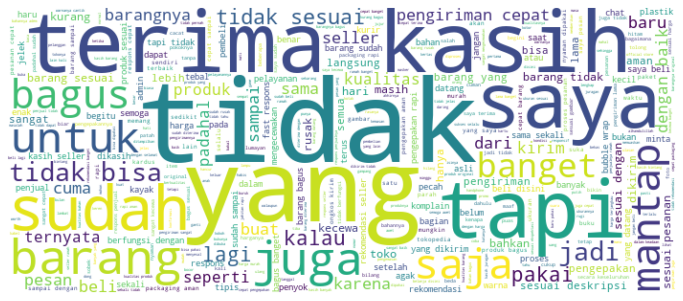

In [40]:
# Membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
# Memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

words  count
0       tidak   3021
1        yang   1732
2      barang   1544
3       sudah   1116
4        saya   1113
..        ...    ...
490   catatan     19
489  kemudian     19
488      anda     19
486  terlihat     19
499      kiri     19

[500 rows x 2 columns]

In [42]:
# Mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

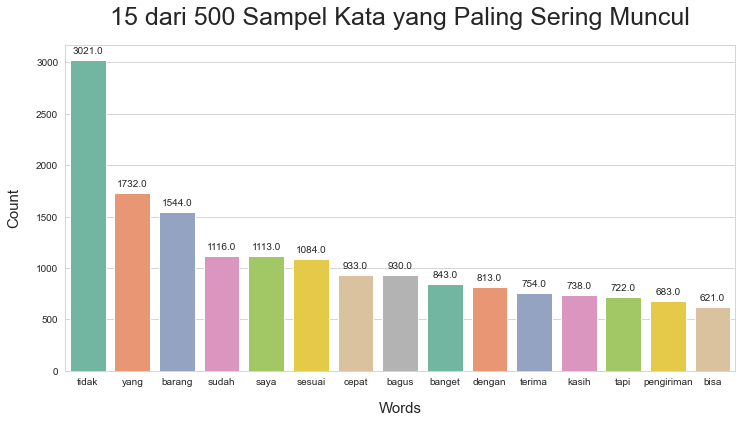

In [43]:
# Membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

### Remove stopword in Bahasa

In [44]:
from nltk.corpus import stopwords

In [45]:
# Menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# Menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [46]:
# Memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [47]:
print(stopwords_indo)

    stopwords_indonenesia
0                     ada
1                  adalah
2                  adanya
3                  adapun
4                    agak
..                    ...
753                  wong
754                 yaitu
755                 yakin
756                 yakni
757                  yang

[758 rows x 1 columns]


In [48]:
# Menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

In [49]:
# Menghapus stopwords

def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

tokped['stop_review'] = tokped['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [50]:
tokped.head()

Customer Review Sentiment  \
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive   
1  barang bagus dan respon cepat, harga bersaing ...  Positive   
2  barang bagus, berfungsi dengan baik, seler ram...  Positive   
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   

                                        clean_review  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respon cepat harga bersaing d...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah tr...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                       normalization  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respons cepat harga bersaing ...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah te...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                          final_text  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus  respons cepat harga bersaing den...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual  juga ramah terim...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                               token  \
0  [alhamdulillah, berfungsi, dengan, baik, packa...   
1  [barang, bagus, respons, cepat, harga, bersain...   
2  [barang, bagus, berfungsi, dengan, baik, seler...   
3  [bagus, sesuai, harapan, penjual, juga, ramah,...   
4  [barang, bagus, pengemasan, aman, dapat, berfu...   

                                         stop_review  
0  [alhamdulillah, berfungsi, packaging, aman, re...  
1   [barang, bagus, respons, cepat, harga, bersaing]  
2  [barang, bagus, berfungsi, seler, ramah, pengi...  
3  [bagus, sesuai, harapan, penjual, ramah, terim...  
4       [barang, bagus, pengemasan, aman, berfungsi]

### Text Normalization

In [51]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [52]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

tokped['stem_review'] = tokped['stop_review'].apply(lambda stem:back_to_root(stem))

In [53]:
tokped[['Customer Review', 'stem_review']].head()

Customer Review  \
0  Alhamdulillah berfungsi dengan baik. Packaging...   
1  barang bagus dan respon cepat, harga bersaing ...   
2  barang bagus, berfungsi dengan baik, seler ram...   
3  bagus sesuai harapan penjual nya juga ramah. t...   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...   

                                         stem_review  
0  alhamdulillah fungsi packaging aman respons ce...  
1             barang bagus respons cepat harga saing  
2        barang bagus fungsi seler ramah kirim cepat  
3   bagus sesuai harap jual ramah terima kasih lapak  
4                      barang bagus emas aman fungsi

In [54]:
tokped.head()

Customer Review Sentiment  \
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive   
1  barang bagus dan respon cepat, harga bersaing ...  Positive   
2  barang bagus, berfungsi dengan baik, seler ram...  Positive   
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   

                                        clean_review  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respon cepat harga bersaing d...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah tr...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                       normalization  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respons cepat harga bersaing ...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah te...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                          final_text  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus  respons cepat harga bersaing den...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual  juga ramah terim...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                               token  \
0  [alhamdulillah, berfungsi, dengan, baik, packa...   
1  [barang, bagus, respons, cepat, harga, bersain...   
2  [barang, bagus, berfungsi, dengan, baik, seler...   
3  [bagus, sesuai, harapan, penjual, juga, ramah,...   
4  [barang, bagus, pengemasan, aman, dapat, berfu...   

                                         stop_review  \
0  [alhamdulillah, berfungsi, packaging, aman, re...   
1   [barang, bagus, respons, cepat, harga, bersaing]   
2  [barang, bagus, berfungsi, seler, ramah, pengi...   
3  [bagus, sesuai, harapan, penjual, ramah, terim...   
4       [barang, bagus, pengemasan, aman, berfungsi]   

                                         stem_review  
0  alhamdulillah fungsi packaging aman respons ce...  
1             barang bagus respons cepat harga saing  
2        barang bagus fungsi seler ramah kirim cepat  
3   bagus sesuai harap jual ramah terima kasih lapak  
4                      barang bagus emas aman fungsi

### Wordcloud for positive sentiment

In [55]:
# Map 'positive' to 1 and 'negative' to 0 in a new column 'sentiment_encoded'
tokped['sentiment_encoded'] = tokped['Sentiment'].map({'Positive': 1, 'Negative': 0})
tokped.head()

Customer Review Sentiment  \
0  Alhamdulillah berfungsi dengan baik. Packaging...  Positive   
1  barang bagus dan respon cepat, harga bersaing ...  Positive   
2  barang bagus, berfungsi dengan baik, seler ram...  Positive   
3  bagus sesuai harapan penjual nya juga ramah. t...  Positive   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...  Positive   

                                        clean_review  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respon cepat harga bersaing d...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah tr...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                       normalization  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus dan respons cepat harga bersaing ...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual nya juga ramah te...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                          final_text  \
0  alhamdulillah berfungsi dengan baik packaging ...   
1  barang bagus  respons cepat harga bersaing den...   
2  barang bagus berfungsi dengan baik seler ramah...   
3  bagus sesuai harapan penjual  juga ramah terim...   
4  barang bagus pengemasan aman dapat berfungsi d...   

                                               token  \
0  [alhamdulillah, berfungsi, dengan, baik, packa...   
1  [barang, bagus, respons, cepat, harga, bersain...   
2  [barang, bagus, berfungsi, dengan, baik, seler...   
3  [bagus, sesuai, harapan, penjual, juga, ramah,...   
4  [barang, bagus, pengemasan, aman, dapat, berfu...   

                                         stop_review  \
0  [alhamdulillah, berfungsi, packaging, aman, re...   
1   [barang, bagus, respons, cepat, harga, bersaing]   
2  [barang, bagus, berfungsi, seler, ramah, pengi...   
3  [bagus, sesuai, harapan, penjual, ramah, terim...   
4       [barang, bagus, pengemasan, aman, berfungsi]   

                                         stem_review  sentiment_encoded  
0  alhamdulillah fungsi packaging aman respons ce...                  1  
1             barang bagus respons cepat harga saing                  1  
2        barang bagus fungsi seler ramah kirim cepat                  1  
3   bagus sesuai harap jual ramah terima kasih lapak                  1  
4                      barang bagus emas aman fungsi                  1

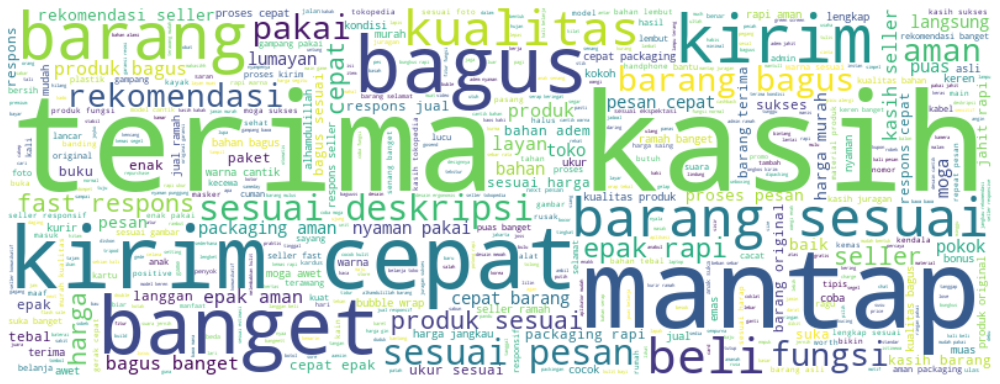

In [56]:
sentiment_pos = ' '.join([review for review in tokped['stem_review'][tokped['Sentiment'] == "Positive"]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

### Wordcloud for negative sentiment

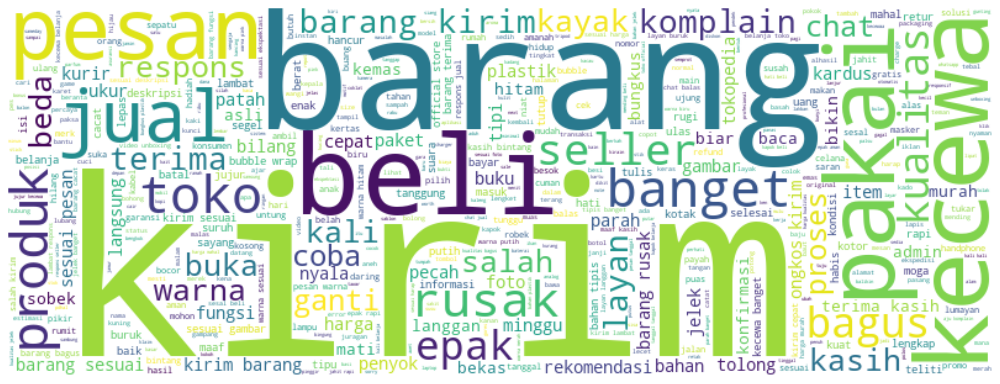

In [57]:
sentiment_neg = ' '.join([review for review in tokped['stem_review'][tokped['Sentiment'] == "Negative"]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [58]:
tokped.to_excel("review_tokped_fix_dataset.xlsx", index=False)

## Data modelling Naive Bayes

In [59]:
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score

In [60]:
class CustomMultinomialNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_log_prior_ = None
        self.feature_log_prob_ = None
        self.classes_ = None
        self.feature_count_ = None
        self.class_count_ = None

    def fit(self, X, y):
        # Count the number of occurrences of each class in the target vector
        self.classes_, class_counts = np.unique(y, return_counts=True)
        self.class_log_prior_ = np.log(class_counts / len(y))

        # Calculate feature counts and feature probabilities
        self.feature_count_ = np.zeros((len(self.classes_), X.shape[1]))
        for i, label in enumerate(self.classes_):
            self.feature_count_[i, :] = X[y == label].sum(axis=0)
        self.feature_log_prob_ = (
            np.log(self.feature_count_ + self.alpha) -
            np.log(self.feature_count_.sum(axis=1)[:, np.newaxis] + self.alpha * X.shape[1])
        )
        return self

    def predict_log_proba(self, X):
        # Calculate log probability of each class based on feature log probabilities
        log_probs = X @ self.feature_log_prob_.T
        log_probs += self.class_log_prior_
        return log_probs

    def predict(self, X):
        # Use the log probability to make a prediction
        return self.classes_[np.argmax(self.predict_log_proba(X), axis=1)]

def preprocess_text(text):
    # Basic preprocessing to lowercase the text and remove punctuation (if necessary)
    text = text.lower()
    # Add more preprocessing steps here if needed
    return text

def create_vocab(X):
    # Create a vocabulary from the tokenized documents
    vocab = defaultdict(int)
    for document in X:
        for word in document.split():
            vocab[word] += 1
    return vocab

def vectorize_text(vocab, X):
    # Convert text to a matrix of token counts
    word_index = {word: i for i, word in enumerate(vocab.keys())}
    matrix = np.zeros((len(X), len(vocab)))
    for i, document in enumerate(X):
        for word in document.split():
            if word in word_index:
                matrix[i, word_index[word]] += 1
    return matrix

### Naive Bayes

In [90]:
# Load the data
data = tokped
data.dropna(subset=['sentiment_encoded'], inplace=True)

# Preprocess the messages and convert labels to integers
data['stem_review'] = data['stem_review'].astype(str).apply(preprocess_text)
data['sentiment_encoded'] = data['sentiment_encoded'].astype(int)

# Split the data into features and labels
X = data['stem_review'].values
y = data['sentiment_encoded'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Create a vocabulary from the training data
vocab = create_vocab(X_train)

# Vectorize the training and testing data
X_train_vectorized = vectorize_text(vocab, X_train)
X_test_vectorized = vectorize_text(vocab, X_test)

# Train the custom Naive Bayes classifier
nb_classifier = CustomMultinomialNB(alpha=1.0)
nb_classifier.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_pred_custom_nb = nb_classifier.predict(X_test_vectorized)

In [95]:
# Calculate precision, recall, and F1 score for the custom Naive Bayes classifier
# Calculate accuracy
custom_nb_accuracy = np.mean(y_pred_custom_nb == y_test)
precision = precision_score(y_test, y_pred_custom_nb, average='weighted')
recall = recall_score(y_test, y_pred_custom_nb, average='weighted')
f1 = f1_score(y_test, y_pred_custom_nb, average='weighted')

print(f'Custom Naive Bayes Accuracy: {custom_nb_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Custom Naive Bayes Accuracy: 0.8868991517436381
Precision: 0.8900584868255778
Recall: 0.8868991517436381
F1 Score: 0.8870893816663258


### Split the review into data train and test

In [79]:
X = tokped['stem_review']
y = tokped['sentiment_encoded']

In [82]:
print(X.shape)
print(y.shape)

(5305,)
(5305,)


In [68]:
from sklearn.model_selection import train_test_split

Mencari parameter untuk data splitting terbaik yang menghasilkan nilai akurasi paling tinggi dan meminimalisir model melakukan kesalahan prediksi

In [96]:
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
  for random in np.arange(0, 30, 5):
    print("test size:", test)
    print("random state:", random)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    # Train the custom Naive Bayes classifier
    nb_classifier = CustomMultinomialNB(alpha=1.0)
    nb_classifier.fit(X_train_vect, y_train)
    
    # Predict the labels for the test data
    y_pred_custom_nb = nb_classifier.predict(X_test_vect)
    accuracy = accuracy_score(y_test, y_pred_custom_nb)
    confusion = confusion_matrix(y_test, y_pred_custom_nb)
    print('confusion matrix:\n', confusion)
    classfication = print(classification_report(y_test, y_pred_custom_nb))
    print("Accuracy Score:", accuracy.round(2))
    recall = recall_score(y_test, y_pred_custom_nb)
    print("Recall Score:", recall)
    precision = precision_score(y_test, y_pred_custom_nb)
    print("Precision Score:", precision)
    print("\n")

    random_num.append(random)
    matrix.append(confusion)
    report.append(classfication)
    acc_num.append(accuracy)
    re_num.append(recall)
    pre_num.append(precision)
    test_num.append(test)
  print("=================================================================")

test size: 0.1
random state: 0
confusion matrix:
 [[219  42]
 [ 14 256]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       261
           1       0.86      0.95      0.90       270

    accuracy                           0.89       531
   macro avg       0.90      0.89      0.89       531
weighted avg       0.90      0.89      0.89       531

Accuracy Score: 0.89
Recall Score: 0.9481481481481482
Precision Score: 0.8590604026845637


test size: 0.1
random state: 5
confusion matrix:
 [[247  39]
 [ 12 233]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       286
           1       0.86      0.95      0.90       245

    accuracy                           0.90       531
   macro avg       0.91      0.91      0.90       531
weighted avg       0.91      0.90      0.90       531

Accuracy Score: 0.9
Recall Score: 0.9510204081632653
Precision Score: 0.8566176470588235


test size: 0.1
ra

confusion matrix:
 [[958 148]
 [ 74 942]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1106
           1       0.86      0.93      0.89      1016

    accuracy                           0.90      2122
   macro avg       0.90      0.90      0.90      2122
weighted avg       0.90      0.90      0.90      2122

Accuracy Score: 0.9
Recall Score: 0.9271653543307087
Precision Score: 0.8642201834862385


test size: 0.4
random state: 10
confusion matrix:
 [[939 146]
 [ 76 961]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.89      1085
           1       0.87      0.93      0.90      1037

    accuracy                           0.90      2122
   macro avg       0.90      0.90      0.90      2122
weighted avg       0.90      0.90      0.90      2122

Accuracy Score: 0.9
Recall Score: 0.926711668273867
Precision Score: 0.8681120144534779


test size: 0.4
random state: 15
confusion matrix:

In [97]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

test_size  random_state         confusion_matrix  accuracy    recall  \
0         0.1             0   [[219, 42], [14, 256]]  0.894539  0.948148   
1         0.1             5   [[247, 39], [12, 233]]  0.903955  0.951020   
2         0.1            10   [[229, 37], [18, 247]]  0.896422  0.932075   
3         0.1            15   [[243, 36], [19, 233]]  0.896422  0.924603   
4         0.1            20   [[228, 51], [11, 241]]  0.883239  0.956349   
5         0.1            25   [[238, 42], [20, 231]]  0.883239  0.920319   
6         0.2             0   [[460, 80], [41, 480]]  0.885957  0.921305   
7         0.2             5   [[497, 76], [33, 455]]  0.897267  0.932377   
8         0.2            10   [[461, 74], [45, 481]]  0.887842  0.914449   
9         0.2            15   [[474, 74], [40, 473]]  0.892554  0.922027   
10        0.2            20   [[458, 90], [37, 476]]  0.880302  0.927875   
11        0.2            25   [[465, 71], [44, 481]]  0.891612  0.916190   
12        0.3             0  [[710, 110], [53, 719]]  0.897613  0.931347   
13        0.3             5  [[724, 111], [50, 707]]  0.898869  0.933950   
14        0.3            10  [[698, 107], [68, 719]]  0.890075  0.913596   
15        0.3            15  [[720, 115], [58, 699]]  0.891332  0.923382   
16        0.3            20  [[698, 117], [61, 716]]  0.888191  0.921493   
17        0.3            25  [[687, 110], [70, 725]]  0.886935  0.911950   
18        0.4             0  [[944, 142], [76, 960]]  0.897267  0.926641   
19        0.4             5  [[958, 148], [74, 942]]  0.895382  0.927165   
20        0.4            10  [[939, 146], [76, 961]]  0.895382  0.926712   
21        0.4            15  [[948, 150], [83, 941]]  0.890198  0.918945   
22        0.4            20  [[916, 170], [86, 950]]  0.879359  0.916988   
23        0.4            25  [[932, 155], [92, 943]]  0.883600  0.911111   

    precision  
0    0.859060  
1    0.856618  
2    0.869718  
3    0.866171  
4    0.825342  
5    0.846154  
6    0.857143  
7    0.856874  
8    0.866667  
9    0.864717  
10   0.840989  
11   0.871377  
12   0.867310  
13   0.864303  
14   0.870460  
15   0.858722  
16   0.859544  
17   0.868263  
18   0.871143  
19   0.864220  
20   0.868112  
21   0.862511  
22   0.848214  
23   0.858834

In [98]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

test_size  random_state         confusion_matrix accuracy recall precision
0        0.1             0   [[219, 42], [14, 256]]     0.89   0.95      0.86
1        0.1             5   [[247, 39], [12, 233]]     0.90   0.95      0.86
2        0.1            10   [[229, 37], [18, 247]]     0.90   0.93      0.87
3        0.1            15   [[243, 36], [19, 233]]     0.90   0.92      0.87
4        0.1            20   [[228, 51], [11, 241]]     0.88   0.96      0.83
5        0.1            25   [[238, 42], [20, 231]]     0.88   0.92      0.85
6        0.2             0   [[460, 80], [41, 480]]     0.89   0.92      0.86
7        0.2             5   [[497, 76], [33, 455]]     0.90   0.93      0.86
8        0.2            10   [[461, 74], [45, 481]]     0.89   0.91      0.87
9        0.2            15   [[474, 74], [40, 473]]     0.89   0.92      0.86
10       0.2            20   [[458, 90], [37, 476]]     0.88   0.93      0.84
11       0.2            25   [[465, 71], [44, 481]]     0.89   0.92      0.87
12       0.3             0  [[710, 110], [53, 719]]     0.90   0.93      0.87
13       0.3             5  [[724, 111], [50, 707]]     0.90   0.93      0.86
14       0.3            10  [[698, 107], [68, 719]]     0.89   0.91      0.87
15       0.3            15  [[720, 115], [58, 699]]     0.89   0.92      0.86
16       0.3            20  [[698, 117], [61, 716]]     0.89   0.92      0.86
17       0.3            25  [[687, 110], [70, 725]]     0.89   0.91      0.87
18       0.4             0  [[944, 142], [76, 960]]     0.90   0.93      0.87
19       0.4             5  [[958, 148], [74, 942]]     0.90   0.93      0.86
20       0.4            10  [[939, 146], [76, 961]]     0.90   0.93      0.87
21       0.4            15  [[948, 150], [83, 941]]     0.89   0.92      0.86
22       0.4            20  [[916, 170], [86, 950]]     0.88   0.92      0.85
23       0.4            25  [[932, 155], [92, 943]]     0.88   0.91      0.86

Visualisasi grafik untuk melihat kenaikan akurasi terbaik berdasarkan test_size

In [99]:
 import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

Visualisasi grafik untuk melihat kenaikan recall terbaik berdasarkan test_size

In [100]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

Visualisasi grafik untuk melihat kenaikan precision terbaik berdasarkan test_size

In [101]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

Berdasarkan hasil penelitian di atas terkait parameter test_size dan random_state terbaik, diperoleh bahwa ukuran test_size = 0,1 dan random_state = 20 memperoleh nilai akurasi, recall, dan precision lebih tinggi dibandingkan ukuran yang lain. Sehingga ukuran tersebut akan digunakan untuk melakukan splitting dataset.

### Data Splitting into data train and data test

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=20)

In [103]:
X_train.shape

(4774,)

In [104]:
X_test.shape

(531,)

In [105]:
X_train

array(['gambar nyata kayak main bingung maka pakai tanggung sekli kecuali naro benang pungsi sesal banget beli kotak',
       'produk kemas rapi kedap sesuai deskripsi cacat harga produk tawar wajar respons seller cepat kirim relatif cepat terima kasih sukses',
       'barang bagus epak rapi aman harga murah kirim cepat terima kasih seller',
       ...,
       'kecewa sesuai ekspektasi gambar tangkai bening nampak kuat ukur skitar 38cm lai sambung',
       'barang kirim sesuai model',
       'barang original hemat listrik bahan kuat awet mutu jamin jual ramah banget packaging aman proses pesan cepat gampang pakai'],
      dtype=object)

In [106]:
print(X_train)

['gambar nyata kayak main bingung maka pakai tanggung sekli kecuali naro benang pungsi sesal banget beli kotak'
 'produk kemas rapi kedap sesuai deskripsi cacat harga produk tawar wajar respons seller cepat kirim relatif cepat terima kasih sukses'
 'barang bagus epak rapi aman harga murah kirim cepat terima kasih seller'
 ...
 'kecewa sesuai ekspektasi gambar tangkai bening nampak kuat ukur skitar 38cm lai sambung'
 'barang kirim sesuai model'
 'barang original hemat listrik bahan kuat awet mutu jamin jual ramah banget packaging aman proses pesan cepat gampang pakai']


## Naive Bayes + TF-IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [126]:
y_train.shape

(4774,)

In [127]:
X_train_vect

<4774x4912 sparse matrix of type '<class 'numpy.float64'>'
	with 39501 stored elements in Compressed Sparse Row format>

In [128]:
print(X_train_vect)

  (0, 2319)	0.21710230666501923
  (0, 480)	0.11649764940614975
  (0, 380)	0.11023460820489998
  (0, 4059)	0.21141790446033515
  (0, 3586)	0.29812632968971375
  (0, 488)	0.27749014941285166
  (0, 2964)	0.323686563129883
  (0, 2101)	0.2898977724334438
  (0, 3964)	0.34924679657005225
  (0, 4402)	0.20887374940874928
  (0, 3241)	0.11649764940614975
  (0, 2614)	0.323686563129883
  (0, 577)	0.2682227735453578
  (0, 2610)	0.21510854424934708
  (0, 2081)	0.17727957918452708
  (0, 3124)	0.25466269354309173
  (0, 1512)	0.17119972416022672
  (1, 4311)	0.22602635292298373
  (1, 2065)	0.13068674782082443
  (1, 4492)	0.12857159332977172
  (1, 3691)	0.3754604106681337
  (1, 2234)	0.1076005576648861
  (1, 833)	0.2520638773313558
  (1, 3989)	0.1502609118242914
  (1, 3750)	0.1522767749770549
  :	:
  (4771, 4061)	0.10680763967626526
  (4771, 1512)	0.18643786319191805
  (4772, 2873)	0.7830508131542346
  (4772, 398)	0.32866165620696347
  (4772, 2234)	0.35369084740297746
  (4772, 4061)	0.3920659692209352
  (

In [129]:
type(X_train_vect)

scipy.sparse.csr.csr_matrix

In [130]:
dense_array = X_train_vect.toarray()

In [131]:
dense_array.shape

(4774, 4912)

In [132]:
print(dense_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [133]:
non_zero_mask = dense_array != 0
non_zero_values = dense_array[non_zero_mask]

print("Non-zero values in the dense array:")
print(non_zero_values)

Non-zero values in the dense array:
[0.11023461 0.11649765 0.27749015 ... 0.14103338 0.19916395 0.21484382]


In [134]:
value = dense_array[232, 3434]

In [135]:
print(value)

0.0


In [136]:
# Load the data
data = tokped
data.dropna(subset=['sentiment_encoded'], inplace=True)

# Preprocess the messages and convert labels to integers
data['stem_review'] = data['stem_review'].astype(str).apply(preprocess_text)
data['sentiment_encoded'] = data['sentiment_encoded'].astype(int)

# Split the data into features and labels
X = data['stem_review'].values
y = data['sentiment_encoded'].values

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a vocabulary from the training data
vocab = create_vocab(X_train)

# Vectorize the training and testing data
X_train_vectorized = vectorize_text(vocab, X_train)
X_test_vectorized = vectorize_text(vocab, X_test)

# Train the custom Naive Bayes classifier
nb_classifier = CustomMultinomialNB(alpha=1.0)
nb_classifier.fit(dense_array, y_train)

# Predict the labels for the test data
y_pred_custom_nb = nb_classifier.predict(X_test_vect)

In [137]:
print(X_train_vect)

  (0, 2319)	0.21710230666501923
  (0, 480)	0.11649764940614975
  (0, 380)	0.11023460820489998
  (0, 4059)	0.21141790446033515
  (0, 3586)	0.29812632968971375
  (0, 488)	0.27749014941285166
  (0, 2964)	0.323686563129883
  (0, 2101)	0.2898977724334438
  (0, 3964)	0.34924679657005225
  (0, 4402)	0.20887374940874928
  (0, 3241)	0.11649764940614975
  (0, 2614)	0.323686563129883
  (0, 577)	0.2682227735453578
  (0, 2610)	0.21510854424934708
  (0, 2081)	0.17727957918452708
  (0, 3124)	0.25466269354309173
  (0, 1512)	0.17119972416022672
  (1, 4311)	0.22602635292298373
  (1, 2065)	0.13068674782082443
  (1, 4492)	0.12857159332977172
  (1, 3691)	0.3754604106681337
  (1, 2234)	0.1076005576648861
  (1, 833)	0.2520638773313558
  (1, 3989)	0.1502609118242914
  (1, 3750)	0.1522767749770549
  :	:
  (4771, 4061)	0.10680763967626526
  (4771, 1512)	0.18643786319191805
  (4772, 2873)	0.7830508131542346
  (4772, 398)	0.32866165620696347
  (4772, 2234)	0.35369084740297746
  (4772, 4061)	0.3920659692209352
  (

In [138]:
print(y_train)

[0 1 1 ... 0 0 1]


In [139]:
y_test.shape

(531,)

In [140]:
y_pred_custom_nb.shape

(531,)

In [141]:
# Calculate precision, recall, and F1 score for the custom Naive Bayes classifier
# Calculate accuracy
custom_nb_accuracy = np.mean(y_pred_custom_nb == y_test)
precision = precision_score(y_test, y_pred_custom_nb, average='weighted')
recall = recall_score(y_test, y_pred_custom_nb, average='weighted')
f1 = f1_score(y_test, y_pred_custom_nb, average='weighted')

print(f'Custom Naive Bayes Accuracy: {custom_nb_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Custom Naive Bayes Accuracy: 0.8832391713747646
Precision: 0.8929289965833571
Recall: 0.8832391713747646
F1 Score: 0.8830237087963907


## Naive Bayes + TF-IDF + N-GRAM

In [142]:
# Bigram
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(2,2))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [143]:
dense_array = X_train_vect.toarray()

In [144]:
# Train the custom Naive Bayes classifier
nb_classifier = CustomMultinomialNB(alpha=1.0)
nb_classifier.fit(dense_array, y_train)

# Predict the labels for the test data
y_pred_custom_nb = nb_classifier.predict(X_test_vect)

In [145]:
# Calculate precision, recall, and F1 score for the custom Naive Bayes classifier
# Calculate accuracy
custom_nb_accuracy = np.mean(y_pred_custom_nb == y_test)
precision = precision_score(y_test, y_pred_custom_nb, average='weighted')
recall = recall_score(y_test, y_pred_custom_nb, average='weighted')
f1 = f1_score(y_test, y_pred_custom_nb, average='weighted')

print(f'Custom Naive Bayes Accuracy: {custom_nb_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Custom Naive Bayes Accuracy: 0.8455743879472694
Precision: 0.8496664582984915
Recall: 0.8455743879472694
F1 Score: 0.845588627789493


In [146]:
# Trigram
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(2,2)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

SyntaxError: invalid syntax (<ipython-input-146-057d2680b523>, line 3)

In [147]:
dense_array = X_train_vect.toarray()

In [148]:
# Train the custom Naive Bayes classifier
nb_classifier = CustomMultinomialNB(alpha=1.0)
nb_classifier.fit(dense_array, y_train)

# Predict the labels for the test data
y_pred_custom_nb = nb_classifier.predict(X_test_vect)

In [149]:
# Calculate precision, recall, and F1 score for the custom Naive Bayes classifier
# Calculate accuracy
custom_nb_accuracy = np.mean(y_pred_custom_nb == y_test)
precision = precision_score(y_test, y_pred_custom_nb, average='weighted')
recall = recall_score(y_test, y_pred_custom_nb, average='weighted')
f1 = f1_score(y_test, y_pred_custom_nb, average='weighted')

print(f'Custom Naive Bayes Accuracy: {custom_nb_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Custom Naive Bayes Accuracy: 0.8455743879472694
Precision: 0.8496664582984915
Recall: 0.8455743879472694
F1 Score: 0.845588627789493


In [150]:
from sklearn.feature_extraction.text import CountVectorizer

## Naive Bayes + N-gram

In [151]:
# Bigram
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer with n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Adjust ngram_range as needed

# Fit the vectorizer on training data and transform training data
X_train_vectorized = ngram_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_vectorized = ngram_vectorizer.transform(X_test)

# Train the custom Naive Bayes classifier
nb_classifier = CustomMultinomialNB(alpha=1.0)
nb_classifier.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_pred_custom_nb = nb_classifier.predict(X_test_vectorized)

# Evaluate the accuracy
custom_nb_accuracy = np.mean(y_pred_custom_nb == y_test)
precision = precision_score(y_test, y_pred_custom_nb, average='weighted')
recall = recall_score(y_test, y_pred_custom_nb, average='weighted')
f1 = f1_score(y_test, y_pred_custom_nb, average='weighted')

print(f'Custom Naive Bayes Accuracy: {custom_nb_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Custom Naive Bayes Accuracy: 0.8906691800188501
Precision: 0.8946789328452744
Recall: 0.8906691800188501
F1 Score: 0.8908512359653052


In [152]:
# Trigram
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer with n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))  # Adjust ngram_range as needed

# Fit the vectorizer on training data and transform training data
X_train_vectorized = ngram_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_vectorized = ngram_vectorizer.transform(X_test)

# Train the custom Naive Bayes classifier
nb_classifier = CustomMultinomialNB(alpha=1.0)
nb_classifier.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_pred_custom_nb = nb_classifier.predict(X_test_vectorized)

# Evaluate the accuracy
custom_nb_accuracy = np.mean(y_pred_custom_nb == y_test)
precision = precision_score(y_test, y_pred_custom_nb, average='weighted')
recall = recall_score(y_test, y_pred_custom_nb, average='weighted')
f1 = f1_score(y_test, y_pred_custom_nb, average='weighted')

print(f'Custom Naive Bayes Accuracy: {custom_nb_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Custom Naive Bayes Accuracy: 0.8265786993402451
Precision: 0.8317217452297982
Recall: 0.8265786993402451
F1 Score: 0.8268463647781565


### Final Visualization that represented the result of Predicted

In [153]:
predict_df = pd.DataFrame(y_pred_custom_nb, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[0])

543
518


In [154]:
predict_df

predictvalues sentimen
0                 0  negatif
1                 1  positif
2                 0  negatif
3                 0  negatif
4                 0  negatif
...             ...      ...
1056              0  negatif
1057              1  positif
1058              1  positif
1059              1  positif
1060              1  positif

[1061 rows x 2 columns]

In [155]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

predictvalues  sentimen
0              0       518
1              1       543

In [156]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[0]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 51.18 %
percentage of negative sentiment: 48.82 %
difference between percentage positive and negative: 2.36 %


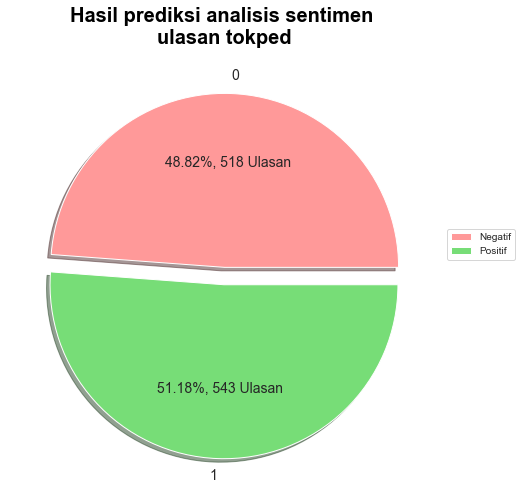

In [157]:
#Pie Chart
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan tokped', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])

# plt.savefig('Hasilprediksi_tokped.png')
plt.show()

Model berhasil memprediksi data uji ulasan sebagai sentimen positif sebesar 54,9% atau sebanyak 292 ulasan dan sentimen negatif sebesar 45,01% atau sebanyak 239 ulasan. Dapat dilihat bahwa model lebih banyak memprediksi ulasan baru sebagai sentimen positif dibandingkan dengan negatif. Penyebabnya adalah di masa lampau model lebih banyak belajar dan
mengenali pola data ulasan yang positif dibandingkan negatif, sehingga model menjadi kurang mempelajari pola data ulasan yang negatif.

## Evaluasi

In [158]:
matrix = confusion_matrix(y_test, y_pred_custom_nb)
matrix

array([[454, 120],
       [ 64, 423]], dtype=int64)

### Confusion Matrix Visualization

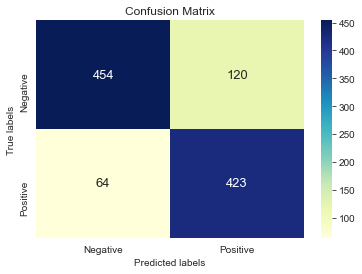

In [159]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [160]:
target_names = ['Negative','Positive']
print(classification_report(y_test, y_pred_custom_nb, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.88      0.79      0.83       574
    Positive       0.78      0.87      0.82       487

    accuracy                           0.83      1061
   macro avg       0.83      0.83      0.83      1061
weighted avg       0.83      0.83      0.83      1061



In [161]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

akurasi = accuracy_score(y_test, y_pred_custom_nb)
print("Accuracy model:", round(akurasi,2))

recall = recall_score(y_test, y_pred_custom_nb)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, y_pred_custom_nb)
print("Precision model:", round(precision,2))

Accuracy model: 0.83
Recall model: 0.87
Precision model: 0.78
